<a href="https://colab.research.google.com/github/Patrick4350/OIBSIP/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/Patrick4350/OIBSIP

Cloning into 'OIBSIP'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 66 (delta 23), reused 5 (delta 1), pack-reused 0
Receiving objects: 100% (66/66), 2.91 MiB | 8.80 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [3]:
cd OIBSIP/

/content/OIBSIP


In [4]:
%%writefile advertising.py

Overwriting advertising.py


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pickle


import warnings
warnings.filterwarnings('ignore')

In [6]:
file_url = 'https://raw.githubusercontent.com/Patrick4350/OIBSIP/main/Advertising.csv'
df = pd.read_csv(file_url)

#Dataset Description

In [7]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


#Exploratory Data Analysis (EDA)

In [16]:
#Drop unnanmed column
df.drop('Unnamed: 0', axis = 1, inplace = True)

KeyError: "['Unnamed: 0'] not found in axis"

In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
df.shape

(200, 4)

In [19]:
#Number of null data elements
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [20]:
#Checking for duplicates in the dataset
df.duplicated().sum()

0

In [21]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
columns = df[['TV', 'Radio', 'Newspaper', 'Sales']]

#Histogram Plot

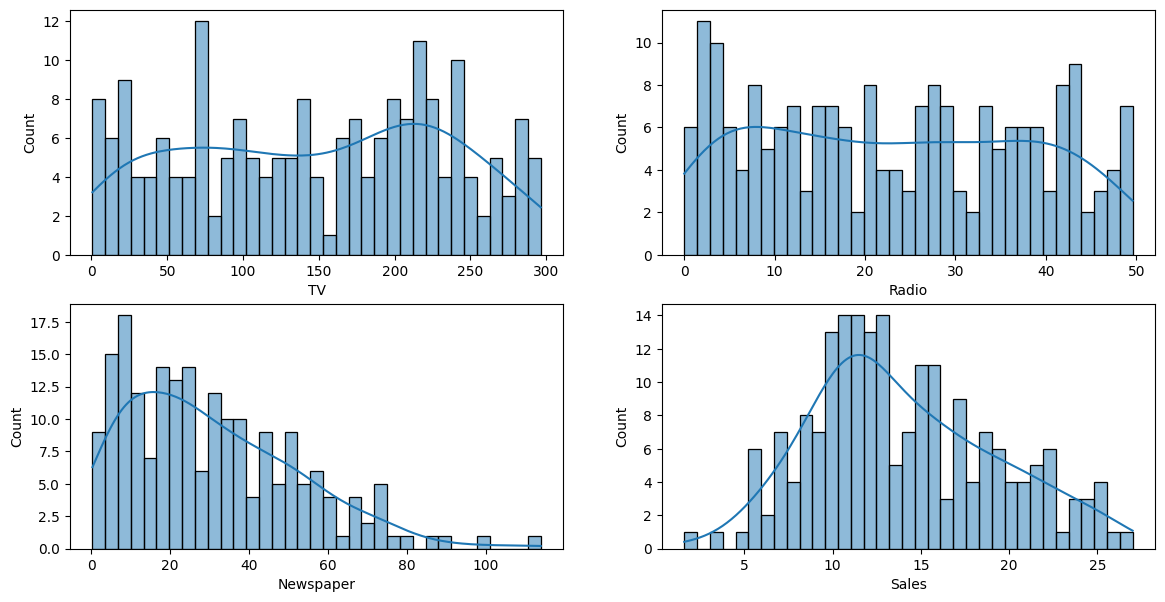

In [24]:
plt.figure(figsize = (14, 7))
for i, col in enumerate(columns):
  plt.subplot(2, 2, i + 1)
  sns.histplot(data = df, x = col, bins = 35, kde = True)

#Linear Regression Plot

In [25]:
dependent_columns = ['TV', 'Radio', 'Newspaper']

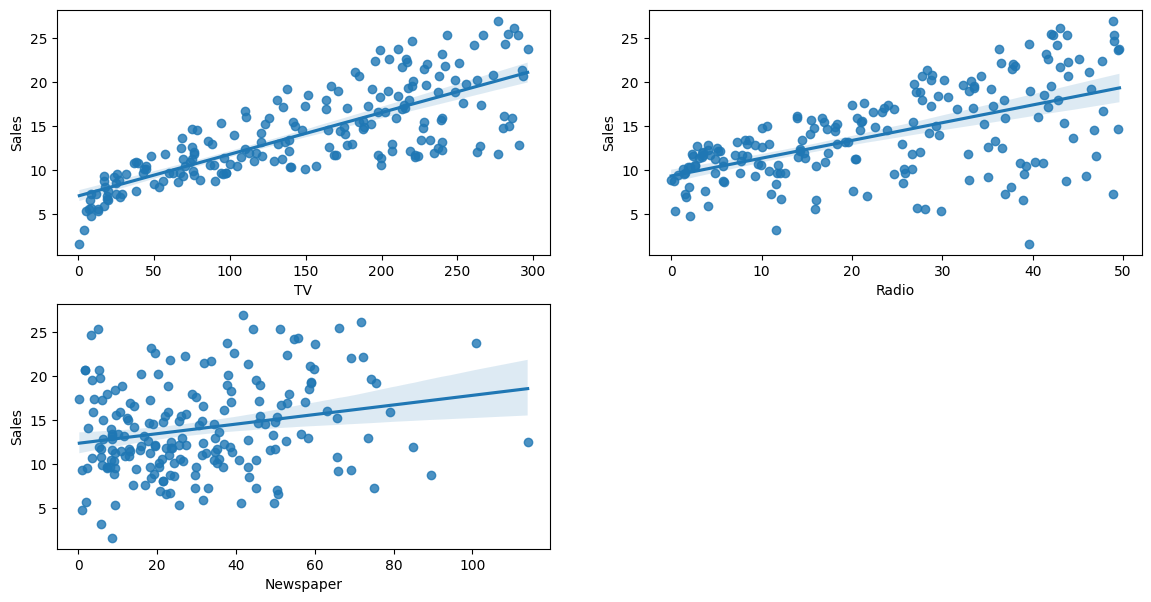

In [26]:
plt.figure(figsize = (14, 7))

for i, col in enumerate(dependent_columns):
  plt.subplot(2, 2, i + 1)
  sns.regplot(data = df, x = col, y = 'Sales')


#Box Plot

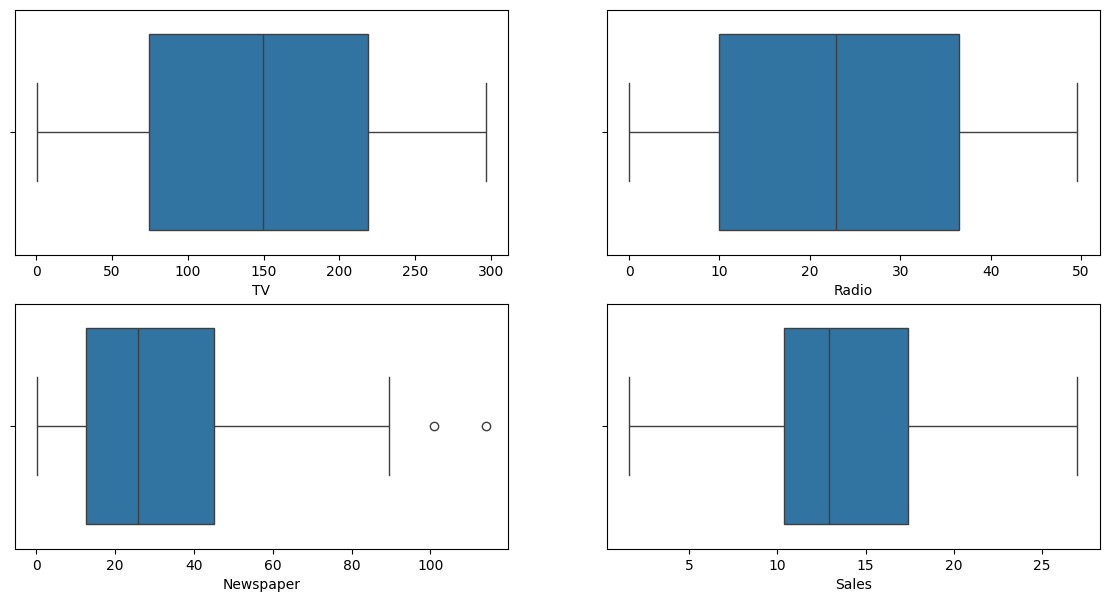

In [27]:
plt.figure(figsize = (14, 7))

for i, col in enumerate(columns):
  plt.subplot(2, 2, i + 1)
  sns.boxplot(data = df, x = col, orient = 'h')

#Heatmap

<Axes: >

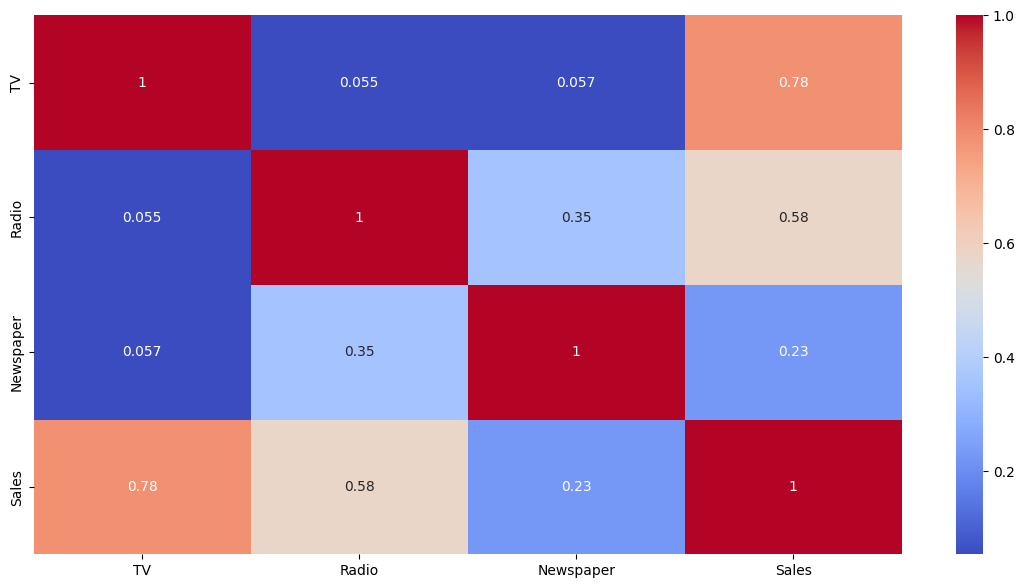

In [28]:
corr = columns.corr()
plt.figure(figsize = (14, 7))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')



*   An increase in the money spent for TV advertisement increases the sales by 0.78 - a positive strong correlation.
*   An increase in the amount of money sent for TV advertisement causes a small marginal change in the amount of money spent for radio and newspaper advertisement.


#Feature Selection

In [29]:
df['Total_Spent_On_Ads'] = df.sum(axis = 1) - df['Sales']

In [30]:
df.head()

,TV,Radio,Newspaper,Sales,Total_Spent_On_Ads
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [31]:
#Correlation of data features
df.corr()

,TV,Radio,Newspaper,Sales,Total_Spent_On_Ads
TV,1.000000,0.054809,0.056648,0.782224,0.945330
Radio,0.054809,1.000000,0.354104,0.576223,0.293211
Newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
Sales,0.782224,0.576223,0.228299,1.000000,0.867712
Total_Spent_On_Ads,0.945330,0.293211,0.343059,0.867712,1.000000


In [32]:
#Copy data frame
df_copy = df.copy()

#Train-test Split

In [33]:
X = (df_copy.drop(columns = ['Sales'])).values
Y = df_copy[['Sales']].values.flatten()  #To one dimentional array

In [34]:
X[:10]

array([[230.1,  37.8,  69.2, 337.1],
       [ 44.5,  39.3,  45.1, 128.9],
       [ 17.2,  45.9,  69.3, 132.4],
       [151.5,  41.3,  58.5, 251.3],
       [180.8,  10.8,  58.4, 250. ],
       [  8.7,  48.9,  75. , 132.6],
       [ 57.5,  32.8,  23.5, 113.8],
       [120.2,  19.6,  11.6, 151.4],
       [  8.6,   2.1,   1. ,  11.7],
       [199.8,   2.6,  21.2, 223.6]])

In [35]:
Y[:10]

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6])

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)


In [37]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

print()
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(200, 4)
(150, 4)
(50, 4)

(200,)
(150,)
(50,)


#Scaling

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
print(X_train_scaled[:10])
print()
print(X_test_scaled[:10])

[[-8.81429704e-01  1.56851374e+00  1.95623278e-01 -5.22306867e-01]
 [ 1.82067972e-01 -1.10371242e+00 -8.54605600e-01 -2.05045103e-01]
 [-1.70086527e+00  1.70986576e+00  2.15572787e+00 -8.18638167e-01]
 [-1.71147667e+00  1.03676093e+00  9.74825349e-01 -1.20750415e+00]
 [-9.02652496e-01 -1.52776846e+00 -7.57810312e-01 -1.26588913e+00]
 [-2.77759182e-01 -1.19794710e+00  4.07508164e-02 -4.46296236e-01]
 [-9.38023815e-01 -4.37338643e-01 -8.49765836e-01 -1.14140795e+00]
 [ 1.61224833e+00  1.26561657e+00  1.00386394e+00  1.94197982e+00]
 [-1.57234948e+00 -2.28676147e-01 -6.51335495e-01 -1.65475511e+00]
 [ 5.26348817e-01 -1.34603016e+00 -1.18854935e+00  9.54722900e-04]]

[[ 0.12193673  0.5453944   1.08613993  0.45040889]
 [ 0.50040985  1.62909318  1.08613993  0.9813817 ]
 [ 1.64997774  0.32326981  0.61668278  1.73487839]
 [-1.66549396  0.90213996  0.71347807 -1.24606027]
 [ 0.7939918   1.7165968  -1.31922298  0.72250491]
 [-0.91798007  0.77425005  1.0764604  -0.48595396]
 [ 0.75272526  1.37331

#Best Model Evaluation and Selection

Models to be evaluated


*   Linear Regression
*   Random Forest
*   Gradient Boosting
*   Support Vector Machine (SVM)
*   K-Nearest Neighbors
*   Decision Tree
*   Ada Boost



In [40]:
#List of models to be evaluated

models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(random_state = 42)),
    ("Gradient Boosting", GradientBoostingRegressor(random_state = 42)),
    ("Support Vector Machine", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor(random_state = 42)),
    ("Ada Boost", AdaBoostRegressor(random_state = 42))
]

best_model = None

#Initialising mean squared error (mse) and coeffiecient of determination (r2) with infinity values
best_mse = np.inf
best_r2 = -np.inf

#List to store results
model_names = []
mse_values = []
r2_values = []

#Iterating over models for performance evaluation
for name, model in models:
  #Creating pipeline for model evaluation
  pipeline = Pipeline([
      ("model", model)
  ])

  #Model evaluation using cross validation
  mse = np.mean(-cross_val_score(pipeline, X_train_scaled, Y_train, cv = 5, scoring = "neg_mean_squared_error"))
  r2 = np.mean(cross_val_score(pipeline, X_train_scaled, Y_train, cv = 5, scoring = "r2"))

  #Metrics for model performance
  print(f"Model: {name}")
  print(f"Cross-Validation Mean Squared Error: {mse}")
  print(f"Cross-Validation Coefficient of Determination: {r2}")
  print()

  #Storing results
  model_names.append(name)
  mse_values.append(mse)
  r2_values.append(r2)

  #Checking for best model
  if mse < best_mse and r2 > best_r2:
    best_model = name
    best_mse = mse
    best_r2 = r2

#Data frame for results display
results = pd.DataFrame({
    'Model': model_names,
    'Mean Squared Error': mse_values,
    'Coefficient of Determination': r2_values
})

#Based model and its performance metrics
print(f"Best Model: {best_model}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best Coefficient of Determination: {best_r2}")
print()

Model: Linear Regression
Cross-Validation Mean Squared Error: 3.040291244111598
Cross-Validation Coefficient of Determination: 0.8714961121899936

Model: Random Forest
Cross-Validation Mean Squared Error: 0.8873184333333335
Cross-Validation Coefficient of Determination: 0.9631769996067472

Model: Gradient Boosting
Cross-Validation Mean Squared Error: 0.7864037233111048
Cross-Validation Coefficient of Determination: 0.9672274964782759

Model: Support Vector Machine
Cross-Validation Mean Squared Error: 3.4652262431012892
Cross-Validation Coefficient of Determination: 0.8624531364955648

Model: K-Nearest Neighbors
Cross-Validation Mean Squared Error: 1.7172666666666667
Cross-Validation Coefficient of Determination: 0.926533243531966

Model: Decision Tree
Cross-Validation Mean Squared Error: 1.4155999999999993
Cross-Validation Coefficient of Determination: 0.941427146140654

Model: Ada Boost
Cross-Validation Mean Squared Error: 1.4206831497987342
Cross-Validation Coefficient of Determinati

In [41]:
#Display results DataFrame
print("Results")
print(results)

Results
                    Model  Mean Squared Error  Coefficient of Determination
0       Linear Regression            3.040291                      0.871496
1           Random Forest            0.887318                      0.963177
2       Gradient Boosting            0.786404                      0.967227
3  Support Vector Machine            3.465226                      0.862453
4     K-Nearest Neighbors            1.717267                      0.926533
5           Decision Tree            1.415600                      0.941427
6               Ada Boost            1.420683                      0.942770


In [42]:
#Save best model
pickle.dump(best_model, open("best_model_sales_prediction.pk1", "wb"))

#Best model Prediction Analysis

In [43]:
model = GradientBoostingRegressor(random_state = 42)
model.fit(X_train_scaled, Y_train)


GradientBoostingRegressor(random_state=42)

In [44]:
Y_pred = model.predict(X_test_scaled)

#Regression plot for test data set

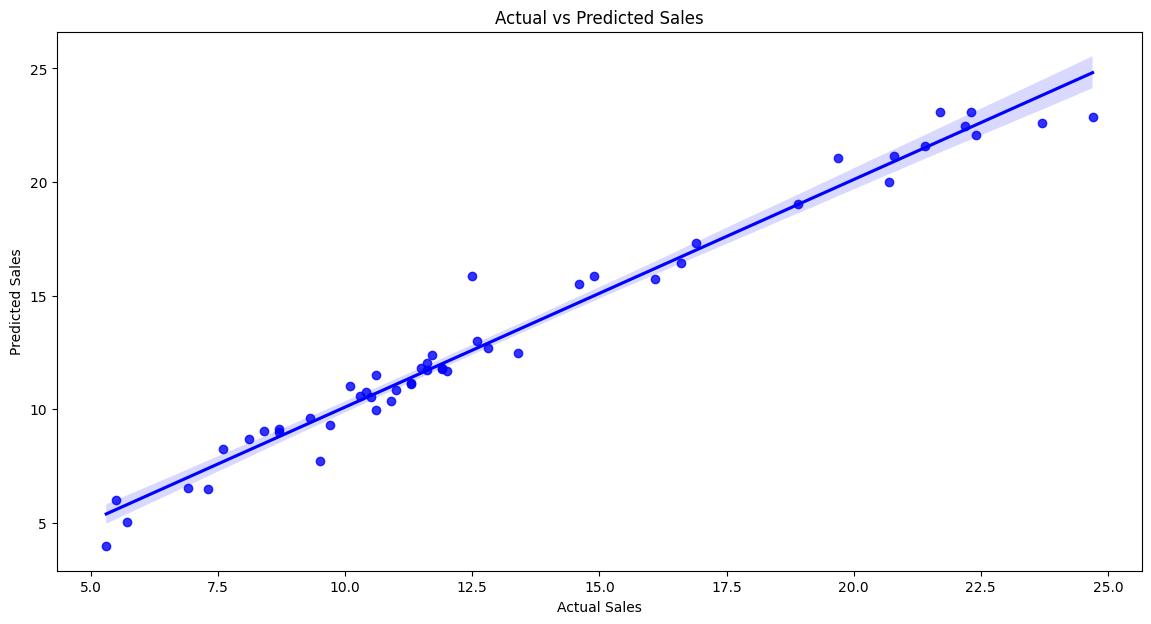

In [46]:
plt.figure(figsize = (14, 7))
sns.regplot(x = Y_test, y = Y_pred, color = 'blue')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

#Conclusion
Random Forest and Gradient Boosting works best for modelling this dataset.

Random Forest could be overfitting on the model, so Gradient Boosting is better!